In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 2*x**2+4*x-3

In [4]:
f(4)

45

In [5]:
xs=np.arange(-5,5,.25)

In [6]:
ys=f(xs)
ys

array([27.   , 23.125, 19.5  , 16.125, 13.   , 10.125,  7.5  ,  5.125,
        3.   ,  1.125, -0.5  , -1.875, -3.   , -3.875, -4.5  , -4.875,
       -5.   , -4.875, -4.5  , -3.875, -3.   , -1.875, -0.5  ,  1.125,
        3.   ,  5.125,  7.5  , 10.125, 13.   , 16.125, 19.5  , 23.125,
       27.   , 31.125, 35.5  , 40.125, 45.   , 50.125, 55.5  , 61.125])

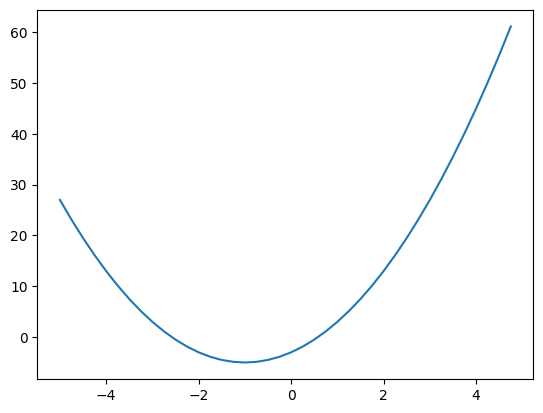

In [7]:
plt.plot(xs,ys)

In [14]:
h=0.001
print((f(xs+h)-f(xs))/h)
numerical_gradient=(f(xs+h)-f(xs))/h

[-1.5998e+01 -1.4998e+01 -1.3998e+01 -1.2998e+01 -1.1998e+01 -1.0998e+01
 -9.9980e+00 -8.9980e+00 -7.9980e+00 -6.9980e+00 -5.9980e+00 -4.9980e+00
 -3.9980e+00 -2.9980e+00 -1.9980e+00 -9.9800e-01  2.0000e-03  1.0020e+00
  2.0020e+00  3.0020e+00  4.0020e+00  5.0020e+00  6.0020e+00  7.0020e+00
  8.0020e+00  9.0020e+00  1.0002e+01  1.1002e+01  1.2002e+01  1.3002e+01
  1.4002e+01  1.5002e+01  1.6002e+01  1.7002e+01  1.8002e+01  1.9002e+01
  2.0002e+01  2.1002e+01  2.2002e+01  2.3002e+01]


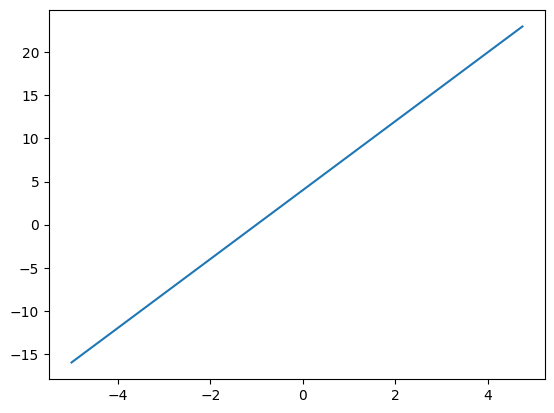

In [15]:
plt.plot(xs,numerical_gradient)

In [51]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data=data
        self._prev=set(_children)
        self._op=_op
    
    def __repr__(self):
        return f"There is a {self.data} stored in the object"
    
    def __add__(self, other):
        value=Value(self.data+other.data, (self,other), '+')
        return value
    
    def __mul__(self, other):
        value=Value(self.data*other.data,(self,other), '*')
        return value

In [53]:
a=Value(5)+Value(3)
b=Value(13)*Value(5)*Value(4)

In [56]:
from graphviz import Digraph

def trace(root):
    nodes, edges= set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

nodes,edges=trace(a)
print(nodes)
print(edges)

{There is a 5 stored in the object, There is a 8 stored in the object, There is a 3 stored in the object}
{(There is a 3 stored in the object, There is a 8 stored in the object), (There is a 5 stored in the object, There is a 8 stored in the object)}


In [58]:
def draw_dot(root):
    dot=Digraph(format='svg', graph_attr={'rank_dir':'LR'})
    
    nodes, edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        dot.node(name=uid,label="{data %.4f}"%(n.data,), shape='record')
        if n._op:
            dot.node(name=uid, label=n._op)
            
            dot.edge(uid+n._op, uid)
        for n1, n2 in edges:
            dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot

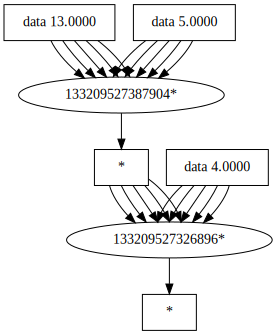

In [59]:
draw_dot(b)